<a href="https://colab.research.google.com/github/Toadoum/STEM-Away-Job/blob/master/Train_data_analysis_STEM_Away.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import re
import pickle

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# # used for better images in medium article
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/My Drive/STEMAway/train_skills_labeled.csv', error_bad_lines = True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
train.head()

,Unnamed: 0,phrase,skill
0,0,deliverables,0
1,1,a broad variety,0
2,2,manage ml infrastructures,0
3,3,and/or patent,0
4,4,sellers,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33122 entries, 0 to 33121
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  33122 non-null  int64 
 1   phrase      33122 non-null  object
 2   skill       33122 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 776.4+ KB


In [7]:
train.fillna(0, inplace = True)
train.skill = train.skill.astype('int8')
train.drop_duplicates('phrase', inplace = True)
train['phrase'] = train.phrase.str.lower()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16903 entries, 0 to 33121
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16903 non-null  int64 
 1   phrase      16903 non-null  object
 2   skill       16903 non-null  int8  
dtypes: int64(1), int8(1), object(1)
memory usage: 412.7+ KB


### Char count

In [8]:
# maximum characters/ string length of an observation within the df
char_count = train.phrase.map(len)
char_count.max()

117

In [9]:
# char count stats
char_count.describe()

count    16903.000000
mean        17.755014
std         10.096565
min          1.000000
25%         10.000000
50%         16.000000
75%         23.000000
max        117.000000
Name: phrase, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


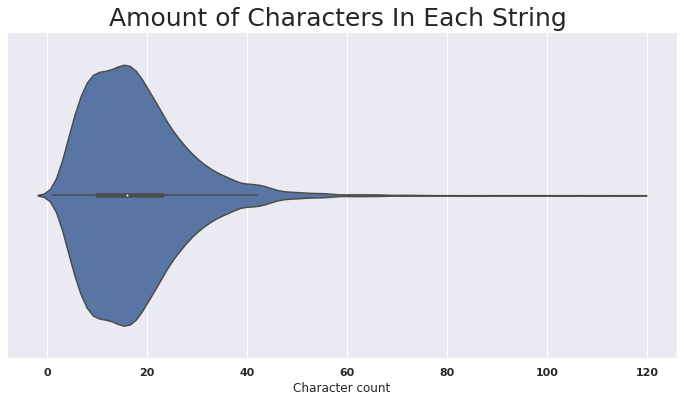

In [10]:
plt.figure(figsize = (12,6))
sns.violinplot(char_count)
plt.title('Amount of Characters In Each String ', size = 25)
plt.xlabel('Character count');

### Word Count

In [11]:
train.phrase.iloc[979:1000]

1146                                  the performance
1147                                     the business
1149                                        architect
1150                                   the experience
1152                                    data engineer
1153                       innovative problem-solvers
1154                                      new systems
1155                                       creativity
1156                               recruitment agency
1158                                          respect
1160                             complex data science
1162                                          a force
1163                                        1-2 years
1164                                            fluid
1165                                            visas
1166                          the visualization tools
1167    interpret datadevelop machine learning models
1171                                         addition
1174                        

In [12]:
# the strings are broken up in to elements/ tokenized
tokenized = train.phrase.str.split(' ')
train['tokenized'] = tokenized

# the maximimum amount of words in a phrase
word_count = train.tokenized.map(len)
word_count.max()

12

In [13]:
index = train.tokenized.loc[word_count == 10].index
print(train.tokenized.iloc[index[0]])

['mining/machine']


In [14]:
# word_count stats
word_count.describe()

count    16903.000000
mean         2.286103
std          1.144728
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: tokenized, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


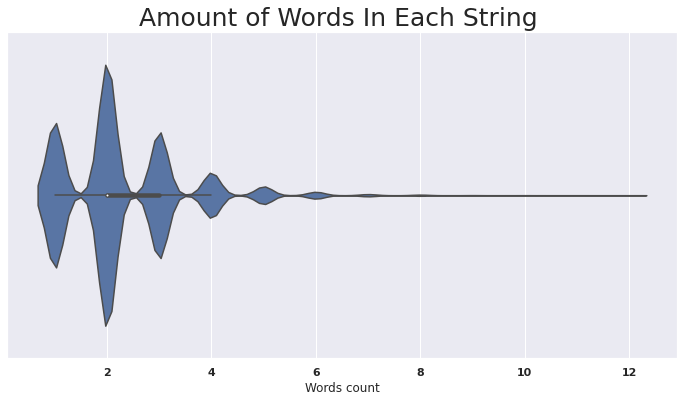

In [15]:
plt.figure(figsize = (12,6))
sns.violinplot(word_count)
plt.title('Amount of Words In Each String ', size = 25)
plt.xlabel('Words count');

# Skills - Target Class Balance

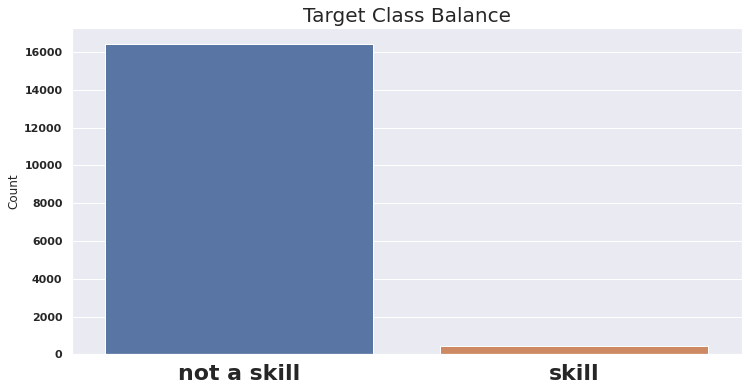

In [16]:
plt.figure(figsize = (12,6))
train['skill_cat'] = np.where(train.skill == 1, 'skill', 'not a skill')
vbar_skill = sns.barplot(x = train.skill_cat.value_counts().index, y = train.skill_cat.value_counts())
plt.title('Target Class Balance', size = 20)
vbar_skill.set_xticklabels(vbar_skill.get_xticklabels(), fontsize = 22);
plt.ylabel('Count');
plt.savefig('target_balance.png', dpi = 400)

In [17]:
# ratio of target class balance
train.skill.sum() / len(train.skill)

0.027509909483523633

They way I use to label the data is still not fine, I'll continious working on it